In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv("data/raw/application_train.csv")

# Dimensions du dataset
print("Dimensions du dataset (lignes, colonnes) :")
print(df.shape)

# Aperçu des premières lignes
print("\nAperçu des 5 premières lignes :")
display(df.head())

# Aperçu aléatoire pour voir d'autres profils de lignes
print("\nAperçu aléatoire de 5 lignes :")
display(df.sample(5, random_state=42))



Dimensions du dataset (lignes, colonnes) :
(307511, 122)

Aperçu des 5 premières lignes :


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0



Aperçu aléatoire de 5 lignes :


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
245895,384575,0,Cash loans,M,Y,N,2,207000.0,465457.5,52641.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
98194,214010,0,Cash loans,F,Y,Y,0,247500.0,1281712.5,48946.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
36463,142232,0,Cash loans,F,Y,N,0,202500.0,495000.0,39109.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
249923,389171,0,Cash loans,F,N,Y,0,247500.0,254700.0,24939.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
158389,283617,0,Cash loans,M,N,Y,0,112500.0,308133.0,15862.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0


In [23]:
# Pourcentage de valeurs manquantes par colonne
missing_percent = df.isnull().mean().sort_values(ascending=False) * 100

print("Top 20 des colonnes avec le plus de valeurs manquantes :")
display(missing_percent.head(20))

# Nombre de colonnes avec plus de 50% de valeurs manquantes
n_cols_30 = (missing_percent > 50).sum()
print(f"\nNombre de colonnes avec >30% de valeurs manquantes : {n_cols_30}")




Top 20 des colonnes avec le plus de valeurs manquantes :


COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
COMMONAREA_MEDI             69.872297
NONLIVINGAPARTMENTS_MEDI    69.432963
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
FONDKAPREMONT_MODE          68.386172
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAPARTMENTS_MEDI       68.354953
LIVINGAPARTMENTS_MODE       68.354953
FLOORSMIN_MODE              67.848630
FLOORSMIN_AVG               67.848630
FLOORSMIN_MEDI              67.848630
YEARS_BUILD_AVG             66.497784
YEARS_BUILD_MODE            66.497784
YEARS_BUILD_MEDI            66.497784
OWN_CAR_AGE                 65.990810
LANDAREA_MEDI               59.376738
LANDAREA_AVG                59.376738
LANDAREA_MODE               59.376738
dtype: float64


Nombre de colonnes avec >30% de valeurs manquantes : 41


Distribution de TARGET :


TARGET
0    282686
1     24825
Name: count, dtype: int64


Distribution en pourcentage :


TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64

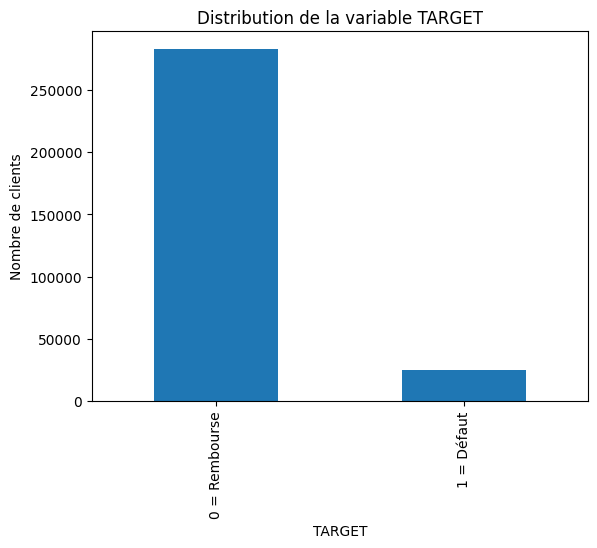

In [24]:
# Distribution de la variable cible
print("Distribution de TARGET :")
display(df['TARGET'].value_counts())

print("\nDistribution en pourcentage :")
display(df['TARGET'].value_counts(normalize=True) * 100)

# Visualisation
df['TARGET'].value_counts().plot(kind="bar")
plt.title("Distribution de la variable TARGET")
plt.xticks([0, 1], ["0 = Rembourse", "1 = Défaut"])
plt.ylabel("Nombre de clients")
plt.show()


In [25]:
# Types des colonnes
print("Types des colonnes :")
display(df.dtypes.value_counts())

# Liste des colonnes par type
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

print("\nColonnes numériques :")
display(num_cols[:15])  # juste 15 pour aperçu

print("\nColonnes catégorielles :")
display(cat_cols[:15])

Types des colonnes :


float64    65
int64      41
object     16
Name: count, dtype: int64


Colonnes numériques :


Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE'],
      dtype='object')


Colonnes catégorielles :


Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE'],
      dtype='object')

In [26]:
key_columns = [
    'SK_ID_CURR',   # Identifiant client
    'TARGET',       # Variable à prédire
    'AMT_INCOME_TOTAL',  # Revenu total
    'AMT_CREDIT',        # Montant du crédit demandé
    'AMT_ANNUITY',       # Montant annuel à rembourser
    'DAYS_BIRTH',        # Âge du client
    'DAYS_EMPLOYED',     # Ancienneté d’emploi
    'NAME_CONTRACT_TYPE', # Type de crédit
]

print("\nAperçu de quelques colonnes importantes :")
display(df[key_columns].head())



Aperçu de quelques colonnes importantes :


,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_BIRTH,DAYS_EMPLOYED,NAME_CONTRACT_TYPE
0,100002,1,202500.0,406597.5,24700.5,-9461,-637,Cash loans
1,100003,0,270000.0,1293502.5,35698.5,-16765,-1188,Cash loans
2,100004,0,67500.0,135000.0,6750.0,-19046,-225,Revolving loans
3,100006,0,135000.0,312682.5,29686.5,-19005,-3039,Cash loans
4,100007,0,121500.0,513000.0,21865.5,-19932,-3038,Cash loans


In [27]:
# Vérification des doublons sur l'ensemble du dataset
total_duplicates = df.duplicated().sum()
print(f"Nombre de lignes dupliquées dans df : {total_duplicates}")

# Vérification des doublons sur la clé client
id_duplicates = df['SK_ID_CURR'].duplicated().sum()
print(f"Nombre d'ID clients dupliqués : {id_duplicates}")


Nombre de lignes dupliquées dans df : 0
Nombre d'ID clients dupliqués : 0


Le dataset contient **307511 lignes** et **122 colonnes** (1 ligne = 1 client).

La variable cible **TARGET** est fortement déséquilibrée  
→ majorité de `0` = bon client.

Les colonnes temporelles (`DAYS_BIRTH`, `DAYS_EMPLOYED`) sont négatives  
→ codage spécifique Home Credit.

Aucun doublon détecté dans le dataset ni dans l’identifiant `SK_ID_CURR`.

## Principales familles de features
- **Informations personnelles** : âge, famille, emploi  
- **Situation financière** : revenu, montant du crédit, annuité  
- **Qualité du dossier** : scores internes, catégories `NAME_*`


Corriger les âges et durées (DAYS_*)

In [28]:
# Copie de travail
df_app = df.copy()

# Remplacer le code spécial 365243 par NaN dans DAYS_EMPLOYED
mask_special = df_app['DAYS_EMPLOYED'] == 365243
print(f"Nombre de lignes avec DAYS_EMPLOYED = 365243 : {mask_special.sum()}")

df_app.loc[mask_special, 'DAYS_EMPLOYED'] = np.nan

# Créer des variables dérivées plus lisibles
df_app['AGE_YEARS'] = -df_app['DAYS_BIRTH'] / 365.25
df_app['YEARS_EMPLOYED'] = -df_app['DAYS_EMPLOYED'] / 365.25

print("\nAperçu des nouvelles colonnes :")
display(df_app[['DAYS_BIRTH', 'AGE_YEARS', 'DAYS_EMPLOYED', 'YEARS_EMPLOYED']].head())


Nombre de lignes avec DAYS_EMPLOYED = 365243 : 55374

Aperçu des nouvelles colonnes :


,DAYS_BIRTH,AGE_YEARS,DAYS_EMPLOYED,YEARS_EMPLOYED
0,-9461,25.902806,-637.0,1.744011
1,-16765,45.900068,-1188.0,3.252567
2,-19046,52.145106,-225.0,0.616016
3,-19005,52.032854,-3039.0,8.320329
4,-19932,54.570842,-3038.0,8.317591


In [29]:
# Vérification des âges
print("Âge minimal / maximal :")
print(df_app['AGE_YEARS'].min(), df_app['AGE_YEARS'].max())

# Vérification de YEARS_EMPLOYED
print("\nAncienneté d'emploi minimale / maximale (en années) :")
print(df_app['YEARS_EMPLOYED'].min(), df_app['YEARS_EMPLOYED'].max())

# Quelques valeurs aberrantes possibles :
print("\nNombre de clients avec âge < 18 ans :")
print((df_app['AGE_YEARS'] < 18).sum())

print("\nNombre de clients avec âge > 100 ans :")
print((df_app['AGE_YEARS'] > 100).sum())

print("\nNombre de clients avec YEARS_EMPLOYED > 60 ans :")
print((df_app['YEARS_EMPLOYED'] > 60).sum())


Âge minimal / maximal :
20.503764544832308 69.07323750855578

Ancienneté d'emploi minimale / maximale (en années) :
-0.0 49.040383299110196

Nombre de clients avec âge < 18 ans :
0

Nombre de clients avec âge > 100 ans :
0

Nombre de clients avec YEARS_EMPLOYED > 60 ans :
0


In [30]:
# Top 15 colonnes les plus manquantes
missing_percent = df_app.isnull().mean().sort_values(ascending=False) * 100
display(missing_percent.head(15))


COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
COMMONAREA_MEDI             69.872297
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_MEDI    69.432963
FONDKAPREMONT_MODE          68.386172
LIVINGAPARTMENTS_MEDI       68.354953
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAPARTMENTS_MODE       68.354953
FLOORSMIN_MODE              67.848630
FLOORSMIN_AVG               67.848630
FLOORSMIN_MEDI              67.848630
YEARS_BUILD_AVG             66.497784
YEARS_BUILD_MODE            66.497784
dtype: float64

In [31]:
# OWN_CAR_AGE (âge du véhicule)
# Beaucoup de valeurs manquantes → on les remplace par 0 = "pas de voiture"
if 'OWN_CAR_AGE' in df_app.columns:
    df_app['OWN_CAR_AGE'].fillna(0, inplace=True)

# AMT_ANNUITY (annuité)
# Rarement manquant → remplacer par la médiane
if df_app['AMT_ANNUITY'].isnull().sum() > 0:
    df_app['AMT_ANNUITY'].fillna(df_app['AMT_ANNUITY'].median(), inplace=True)

# AMT_GOODS_PRICE (prix des biens)
# Quelques valeurs manquantes → médiane aussi
if df_app['AMT_GOODS_PRICE'].isnull().sum() > 0:
    df_app['AMT_GOODS_PRICE'].fillna(df_app['AMT_GOODS_PRICE'].median(), inplace=True)

# Codage simple valeurs manquantes restantes dans colonnes catégorielles
cat_cols = df_app.select_dtypes(include='object').columns

for col in cat_cols:
    df_app[col] = df_app[col].fillna("Unknown")


C:\Users\User\AppData\Local\Temp\ipykernel_6908\3152971721.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_app['OWN_CAR_AGE'].fillna(0, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_6908\3152971721.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [32]:
print("Valeurs manquantes restantes (%):")
display(df_app.isnull().mean().sort_values(ascending=False).head(10))


Valeurs manquantes restantes (%):


COMMONAREA_AVG              0.698723
COMMONAREA_MODE             0.698723
COMMONAREA_MEDI             0.698723
NONLIVINGAPARTMENTS_AVG     0.694330
NONLIVINGAPARTMENTS_MODE    0.694330
NONLIVINGAPARTMENTS_MEDI    0.694330
LIVINGAPARTMENTS_MEDI       0.683550
LIVINGAPARTMENTS_MODE       0.683550
LIVINGAPARTMENTS_AVG        0.683550
FLOORSMIN_MEDI              0.678486
dtype: float64

In [33]:
# Liste des colonnes catégorielles et nombre de catégories
cat_cols = df_app.select_dtypes(include='object').columns

cat_summary = df_app[cat_cols].nunique().sort_values(ascending=False)
print("Nombre de catégories par colonne catégorielle :")
display(cat_summary)


Nombre de catégories par colonne catégorielle :


ORGANIZATION_TYPE             58
OCCUPATION_TYPE               19
NAME_INCOME_TYPE               8
NAME_TYPE_SUITE                8
WALLSMATERIAL_MODE             8
WEEKDAY_APPR_PROCESS_START     7
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
NAME_EDUCATION_TYPE            5
FONDKAPREMONT_MODE             5
HOUSETYPE_MODE                 4
CODE_GENDER                    3
EMERGENCYSTATE_MODE            3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_CONTRACT_TYPE             2
dtype: int64

In [34]:
# Colonnes binaires typiques (Home Credit)
binary_cols = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

for col in binary_cols:
    if col in df_app.columns:
        df_app[col] = df_app[col].map({'Y': 1, 'N': 0})


In [35]:
# LabelEncoder pour colonnes catégorielles simples (< 10 catégories)
simple_cat_cols = [col for col in cat_cols if df_app[col].nunique() <= 10]

le = LabelEncoder()

for col in simple_cat_cols:
    df_app[col] = le.fit_transform(df_app[col])


In [36]:
# LabelEncoder pour colonnes catégorielles simples (< 10 catégories)
simple_cat_cols = [col for col in cat_cols if df_app[col].nunique() <= 10]

le = LabelEncoder()

for col in simple_cat_cols:
    df_app[col] = le.fit_transform(df_app[col])


In [37]:
print("Types de colonnes après encodage :")
display(df_app.dtypes.head(20))


Types de colonnes après encodage :


SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE              int64
CODE_GENDER                     int64
FLAG_OWN_CAR                    int64
FLAG_OWN_REALTY                 int64
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                 int64
NAME_INCOME_TYPE                int64
NAME_EDUCATION_TYPE             int64
NAME_FAMILY_STATUS              int64
NAME_HOUSING_TYPE               int64
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                 float64
DAYS_REGISTRATION             float64
dtype: object

In [38]:
# Colonnes avec une seule valeur unique
unique_cols = [col for col in df_app.columns if df_app[col].nunique() == 1]

print("Colonnes avec valeur unique :")
print(unique_cols)


Colonnes avec valeur unique :
[]


In [39]:
print("Crédits extrêmes :", df_app['AMT_CREDIT'].max())


Crédits extrêmes : 4050000.0


EDA bureau + bureau_balance

In [40]:
# Chargement des fichiers secondaires
df_bureau = pd.read_csv("Data/Raw/bureau.csv")
df_bureau_balance = pd.read_csv("Data/Raw/bureau_balance.csv")

print("bureau :", df_bureau.shape)
print("bureau_balance :", df_bureau_balance.shape)


bureau : (1716428, 17)
bureau_balance : (27299925, 3)


In [41]:
print(df_bureau.columns)


Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')


In [42]:
print(df_bureau_balance.columns)


Index(['SK_ID_BUREAU', 'MONTHS_BALANCE', 'STATUS'], dtype='object')


In [43]:
print("bureau – doublons SK_ID_BUREAU :", df_bureau['SK_ID_BUREAU'].duplicated().sum())
print("bureau_balance – doublons SK_ID_BUREAU :", df_bureau_balance['SK_ID_BUREAU'].duplicated().sum())


bureau – doublons SK_ID_BUREAU : 0
bureau_balance – doublons SK_ID_BUREAU : 26482530


In [44]:
display(df_bureau.isnull().mean().sort_values(ascending=False).head(10))
display(df_bureau.dtypes)

display(df_bureau_balance.isnull().mean().sort_values(ascending=False).head(10))
display(df_bureau_balance.dtypes)


AMT_ANNUITY               0.714735
AMT_CREDIT_MAX_OVERDUE    0.655133
DAYS_ENDDATE_FACT         0.369170
AMT_CREDIT_SUM_LIMIT      0.344774
AMT_CREDIT_SUM_DEBT       0.150119
DAYS_CREDIT_ENDDATE       0.061496
AMT_CREDIT_SUM            0.000008
SK_ID_CURR                0.000000
SK_ID_BUREAU              0.000000
CREDIT_DAY_OVERDUE        0.000000
dtype: float64

SK_ID_CURR                  int64
SK_ID_BUREAU                int64
CREDIT_ACTIVE              object
CREDIT_CURRENCY            object
DAYS_CREDIT                 int64
CREDIT_DAY_OVERDUE          int64
DAYS_CREDIT_ENDDATE       float64
DAYS_ENDDATE_FACT         float64
AMT_CREDIT_MAX_OVERDUE    float64
CNT_CREDIT_PROLONG          int64
AMT_CREDIT_SUM            float64
AMT_CREDIT_SUM_DEBT       float64
AMT_CREDIT_SUM_LIMIT      float64
AMT_CREDIT_SUM_OVERDUE    float64
CREDIT_TYPE                object
DAYS_CREDIT_UPDATE          int64
AMT_ANNUITY               float64
dtype: object

SK_ID_BUREAU      0.0
MONTHS_BALANCE    0.0
STATUS            0.0
dtype: float64

SK_ID_BUREAU       int64
MONTHS_BALANCE     int64
STATUS            object
dtype: object

In [45]:
print("bureau - lignes dupliquées :", df_bureau.duplicated().sum())
print("bureau_balance - lignes dupliquées :", df_bureau_balance.duplicated().sum())


bureau - lignes dupliquées : 0
bureau_balance - lignes dupliquées : 0


In [46]:
unique_cols_bureau = [c for c in df_bureau.columns if df_bureau[c].nunique() == 1]
unique_cols_bureau_balance = [c for c in df_bureau_balance.columns if df_bureau_balance[c].nunique() == 1]

print("Colonnes à valeur unique dans bureau :", unique_cols_bureau)
print("Colonnes à valeur unique dans bureau_balance :", unique_cols_bureau_balance)


Colonnes à valeur unique dans bureau : []
Colonnes à valeur unique dans bureau_balance : []


In [47]:
df_bureau_clean = df_bureau.copy()
df_bureau_balance_clean = df_bureau_balance.copy()


In [49]:
cat_cols = df_bureau_clean.select_dtypes(include='object').columns
for col in cat_cols:
    df_bureau_clean[col].fillna("Unknown", inplace=True)

cat_cols_bb = df_bureau_balance_clean.select_dtypes(include='object').columns
for col in cat_cols_bb:
    df_bureau_balance_clean[col].fillna("Unknown", inplace=True)


C:\Users\User\AppData\Local\Temp\ipykernel_6908\3487062300.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bureau_clean[col].fillna("Unknown", inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_6908\3487062300.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [51]:
from sklearn.preprocessing import LabelEncoder

# Bureau
small_cat_cols = [col for col in df_bureau_clean.select_dtypes(include='object').columns 
                  if df_bureau_clean[col].nunique() <= 2]

le = LabelEncoder()
for col in small_cat_cols:
    df_bureau_clean[col] = le.fit_transform(df_bureau_clean[col])

unique_cols_bureau = [c for c in df_bureau_clean.columns if df_bureau_clean[c].nunique() == 1]
unique_cols_bb = [c for c in df_bureau_balance_clean.columns if df_bureau_balance_clean[c].nunique() == 1]

print("Colonnes inutiles dans bureau :", unique_cols_bureau)
print("Colonnes inutiles dans bureau_balance :", unique_cols_bb)



Colonnes inutiles dans bureau : []
Colonnes inutiles dans bureau_balance : []


In [52]:
print("Doublons bureau :", df_bureau_clean.duplicated().sum())
print("Doublons SK_ID_BUREAU :", df_bureau_clean['SK_ID_BUREAU'].duplicated().sum())


Doublons bureau : 0
Doublons SK_ID_BUREAU : 0


EDA previous_application

In [53]:
df_prev = pd.read_csv("Data/Raw/previous_application.csv")
print("previous_application :", df_prev.shape)
display(df_prev.head())


previous_application : (1670214, 37)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
print(df_prev.columns)


Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')


In [56]:
print("Doublons SK_ID_PREV :", df_prev['SK_ID_PREV'].duplicated().sum())


Doublons SK_ID_PREV : 0


In [55]:
missing_prev = df_prev.isnull().mean().sort_values(ascending=False) * 100
display(missing_prev.head(15))


RATE_INTEREST_PRIVILEGED     99.643698
RATE_INTEREST_PRIMARY        99.643698
AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
NAME_TYPE_SUITE              49.119754
DAYS_TERMINATION             40.298129
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
AMT_GOODS_PRICE              23.081773
AMT_ANNUITY                  22.286665
CNT_PAYMENT                  22.286366
PRODUCT_COMBINATION           0.020716
dtype: float64

In [57]:
df_prev.dtypes.value_counts()


object     16
float64    15
int64       6
Name: count, dtype: int64

In [58]:
num_cols_prev = df_prev.select_dtypes(include=['int64', 'float64']).columns
cat_cols_prev = df_prev.select_dtypes(include=['object']).columns

print("Colonnes numériques :", len(num_cols_prev))
print("Colonnes catégorielles :", len(cat_cols_prev))


Colonnes numériques : 21
Colonnes catégorielles : 16


In [59]:
print("Lignes dupliquées :", df_prev.duplicated().sum())


Lignes dupliquées : 0


In [60]:
unique_cols_prev = [c for c in df_prev.columns if df_prev[c].nunique() == 1]
print("Colonnes à valeur unique :", unique_cols_prev)


Colonnes à valeur unique : []


In [61]:
df_prev_clean = df_prev.copy()


In [62]:
cat_cols = df_prev_clean.select_dtypes(include='object').columns

for col in cat_cols:
    df_prev_clean[col].fillna("Unknown", inplace=True)


C:\Users\User\AppData\Local\Temp\ipykernel_6908\46430839.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_prev_clean[col].fillna("Unknown", inplace=True)


In [63]:
num_cols = df_prev_clean.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    if df_prev_clean[col].isnull().sum() > 0 and df_prev_clean[col].isnull().mean() < 0.2:
        df_prev_clean[col].fillna(df_prev_clean[col].median(), inplace=True)


C:\Users\User\AppData\Local\Temp\ipykernel_6908\2845648946.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_prev_clean[col].fillna(df_prev_clean[col].median(), inplace=True)


In [64]:
from sklearn.preprocessing import LabelEncoder

simple_cats = [col for col in cat_cols if df_prev_clean[col].nunique() <= 10]

le = LabelEncoder()
for col in simple_cats:
    df_prev_clean[col] = le.fit_transform(df_prev_clean[col])


In [65]:
unique_cols_prev = [c for c in df_prev_clean.columns if df_prev_clean[c].nunique() == 1]
print("Colonnes supprimées :", unique_cols_prev)

df_prev_clean.drop(columns=unique_cols_prev, inplace=True)


Colonnes supprimées : []


In [66]:
print("Doublons :", df_prev_clean.duplicated().sum())
print("Doublons SK_ID_PREV :", df_prev_clean['SK_ID_PREV'].duplicated().sum())
df_prev_clean.dtypes.head()


Doublons : 0
Doublons SK_ID_PREV : 0


SK_ID_PREV              int64
SK_ID_CURR              int64
NAME_CONTRACT_TYPE      int64
AMT_ANNUITY           float64
AMT_APPLICATION       float64
dtype: object

EDA installments_payments

In [67]:
df_inst = pd.read_csv("Data/Raw/installments_payments.csv")

print("installments_payments :", df_inst.shape)
display(df_inst.head())


installments_payments : (13605401, 8)


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [68]:
print(df_inst.columns)


Index(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'],
      dtype='object')


In [ ]:
print("Doublons SK_ID_INSTALMENT :", df_inst['SK_ID_INSTALMENT'].duplicated().sum())

In [69]:
missing_inst = df_inst.isnull().mean().sort_values(ascending=False) * 100
display(missing_inst.head(10))


AMT_PAYMENT               0.021352
DAYS_ENTRY_PAYMENT        0.021352
SK_ID_PREV                0.000000
SK_ID_CURR                0.000000
NUM_INSTALMENT_NUMBER     0.000000
NUM_INSTALMENT_VERSION    0.000000
DAYS_INSTALMENT           0.000000
AMT_INSTALMENT            0.000000
dtype: float64

In [70]:
df_inst.dtypes.value_counts()


float64    5
int64      3
Name: count, dtype: int64

In [71]:
num_cols_inst = df_inst.select_dtypes(include=['int64', 'float64']).columns
cat_cols_inst = df_inst.select_dtypes(include='object').columns

print("Nb colonnes numériques :", len(num_cols_inst))
print("Nb colonnes catégorielles :", len(cat_cols_inst))


Nb colonnes numériques : 8
Nb colonnes catégorielles : 0


In [72]:
print("Lignes dupliquées :", df_inst.duplicated().sum())


Lignes dupliquées : 0


In [73]:
unique_cols_inst = [c for c in df_inst.columns if df_inst[c].nunique() == 1]
print("Colonnes à valeur unique :", unique_cols_inst)


Colonnes à valeur unique : []


installments_payments

In [74]:
df_inst_clean = df_inst.copy()


In [75]:
cat_cols = df_inst_clean.select_dtypes(include='object').columns

for col in cat_cols:
    df_inst_clean[col].fillna("Unknown", inplace=True)


In [76]:
num_cols = df_inst_clean.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    if df_inst_clean[col].isnull().sum() > 0 and df_inst_clean[col].isnull().mean() < 0.2:
        df_inst_clean[col].fillna(df_inst_clean[col].median(), inplace=True)


C:\Users\User\AppData\Local\Temp\ipykernel_6908\1332141344.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_inst_clean[col].fillna(df_inst_clean[col].median(), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_6908\1332141344.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [78]:
unique_cols_inst = [c for c in df_inst_clean.columns if df_inst_clean[c].nunique() == 1]
print("Colonnes inutiles :", unique_cols_inst)

df_inst_clean.drop(columns=unique_cols_inst, inplace=True)


Colonnes inutiles : []


In [79]:
print("Doublons dans installments :", df_inst_clean.duplicated().sum())


Doublons dans installments : 0


EDA POS_CASH_balance

In [80]:
df_pos = pd.read_csv("Data/Raw/POS_CASH_balance.csv")

print("POS_CASH_balance :", df_pos.shape)
display(df_pos.head())


POS_CASH_balance : (10001358, 8)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [81]:
print(df_pos.columns)


Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')


In [82]:
print("Doublons SK_ID_PREV :", df_pos['SK_ID_PREV'].duplicated().sum())


Doublons SK_ID_PREV : 9065033


In [83]:
missing_pos = df_pos.isnull().mean().sort_values(ascending=False) * 100
display(missing_pos.head(10))


CNT_INSTALMENT_FUTURE    0.260835
CNT_INSTALMENT           0.260675
SK_ID_CURR               0.000000
SK_ID_PREV               0.000000
MONTHS_BALANCE           0.000000
NAME_CONTRACT_STATUS     0.000000
SK_DPD                   0.000000
SK_DPD_DEF               0.000000
dtype: float64

In [84]:
df_pos.dtypes.value_counts()


int64      5
float64    2
object     1
Name: count, dtype: int64

In [85]:
num_cols_pos = df_pos.select_dtypes(include=['int64', 'float64']).columns
cat_cols_pos = df_pos.select_dtypes(include='object').columns

print("Numériques :", len(num_cols_pos))
print("Catégorielles :", len(cat_cols_pos))


Numériques : 7
Catégorielles : 1


In [86]:
unique_cols_pos = [c for c in df_pos.columns if df_pos[c].nunique() == 1]
print("Colonnes à valeur unique :", unique_cols_pos)


Colonnes à valeur unique : []


In [ ]:
df_pos_clean = df_pos.copy()


In [2]:
cat_cols = df_pos_clean.select_dtypes(include='object').columns

for col in cat_cols:
    df_pos_clean[col].fillna("Unknown", inplace=True)


NameError: name 'df_pos_clean' is not defined

In [1]:
num_cols = df_pos_clean.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    if df_pos_clean[col].isnull().sum() > 0 and df_pos_clean[col].isnull().mean() < 0.2:
        df_pos_clean[col].fillna(df_pos_clean[col].median(), inplace=True)


NameError: name 'df_pos_clean' is not defined

In [ ]:
from sklearn.preprocessing import LabelEncoder

simple_cats = [col for col in cat_cols if df_pos_clean[col].nunique() <= 10]

le = LabelEncoder()
for col in simple_cats:
    df_pos_clean[col] = le.fit_transform(df_pos_clean[col])


In [ ]:
unique_cols_pos = [c for c in df_pos_clean.columns if df_pos_clean[c].nunique() == 1]
print("Colonnes inutiles :", unique_cols_pos)

df_pos_clean.drop(columns=unique_cols_pos, inplace=True)


In [ ]:
print("Doublons :", df_pos_clean.duplicated().sum())


In [ ]:
df_pos_clean.drop_duplicates(inplace=True)


EDA credit_card_balance

In [ ]:
df_cc = pd.read_csv("Data/Raw/credit_card_balance.csv")

print("credit_card_balance :", df_cc.shape)
display(df_cc.head())


In [ ]:
print(df_cc.columns)


In [ ]:
print("Lignes dupliquées :", df_cc.duplicated().sum())


In [ ]:
missing_cc = df_cc.isnull().mean().sort_values(ascending=False) * 100
display(missing_cc.head(10))


In [ ]:
df_cc.dtypes.value_counts()


In [ ]:
num_cols_cc = df_cc.select_dtypes(include=['int64', 'float64']).columns
cat_cols_cc = df_cc.select_dtypes(include='object').columns

print("Numériques :", len(num_cols_cc))
print("Catégorielles :", len(cat_cols_cc))


In [ ]:
unique_cols_cc = [c for c in df_cc.columns if df_cc[c].nunique() == 1]
print("Colonnes à valeur unique :", unique_cols_cc)


In [ ]:
df_cc_clean = df_cc.copy()


In [ ]:
cat_cols = df_cc_clean.select_dtypes(include='object').columns

for col in cat_cols:
    df_cc_clean[col].fillna("Unknown", inplace=True)


In [ ]:
num_cols = df_cc_clean.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    if df_cc_clean[col].isnull().sum() > 0 and df_cc_clean[col].isnull().mean() < 0.2:
        df_cc_clean[col].fillna(df_cc_clean[col].median(), inplace=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder

simple_cats = [col for col in cat_cols if df_cc_clean[col].nunique() <= 10]

le = LabelEncoder()
for col in simple_cats:
    df_cc_clean[col] = le.fit_transform(df_cc_clean[col])


In [ ]:
unique_cols_cc = [c for c in df_cc_clean.columns if df_cc_clean[c].nunique() == 1]
print("Colonnes supprimées :", unique_cols_cc)

df_cc_clean.drop(columns=unique_cols_cc, inplace=True)


In [ ]:
print("Doublons :", df_cc_clean.duplicated().sum())


In [ ]:
df_cc_clean.drop_duplicates(inplace=True)


In [ ]:
df_prev = pd.read_csv("Data/Raw/previous_application.csv")
print(df_prev.shape)
display(df_prev.head())


In [ ]:
prev_client = (
    df_prev.groupby("SK_ID_CURR")
    .agg(
        PREV_APP_COUNT=("SK_ID_PREV", "count"),
        PREV_AMT_CREDIT_MEAN=("AMT_CREDIT", "mean"),
        PREV_AMT_CREDIT_MAX=("AMT_CREDIT", "max"),
        PREV_AMT_ANNUITY_MEAN=("AMT_ANNUITY", "mean"),
        PREV_CNT_PAYMENT_MEAN=("CNT_PAYMENT", "mean"),
        PREV_DAYS_DECISION_MEAN=("DAYS_DECISION", "mean"),
    )
    .reset_index()
)

print(prev_client.shape)
display(prev_client.head())


In [ ]:
df_step2 = df_step1.merge(prev_client, on="SK_ID_CURR", how="left")
print("df_step2:", df_step2.shape)
